<a href="https://colab.research.google.com/github/munas-git/Skin-Cancer-Detection/blob/main/Skin_Cancer_Prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [2]:
! kaggle datasets download -d farjanakabirsamanta/skin-cancer-dataset

100% 2.57G/2.58G [00:24<00:00, 201MB/s]
100% 2.58G/2.58G [00:24<00:00, 114MB/s]


In [7]:
# !unzip \*.zip && rm *.zip

## Importing Important libraries

In [17]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
# Data for potental analysis. However, I'm focused on building a deep learning model for disease detection.

meta_data = pd.read_csv("/content/HAM10000_metadata.csv")
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [43]:
meta_data.dx.unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

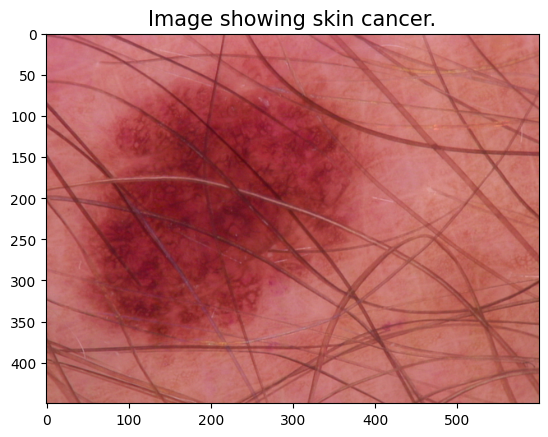

In [38]:
image = "/content/Skin Cancer/Skin Cancer/ISIC_0024320.jpg"
sample_image = cv2.imread(image)[:,:,::-1] # Square brackets corrects image color
plt.title("Image showing skin cancer.", fontsize= 15)
plt.imshow(sample_image);

## Data Preprocessing & Augmentation